## Problem set 5: Databases with SQL and Python

## Auto dealership database

### Table: Employee

* **id** - Unique identifier
* **name** - First name 
* **salary** - Salary in €
* **education** - High School, Bachelor or Master
* **department** - Admin, Sales or Service

### Table: Car

* **id** - Unique identifier
* **make** - Car manufacturer, e.g., Toyota or BMW
* **type** - Type of car, e.g., Sedan or SUV
* **year** - Production year of the car
* **color** - Color of Car
* **msrp** - Manufacturer's suggested retail price in €
* **employee_id** - Identifier from employee table, telling us which employee is responsible for the car  

### Table: Customer

* **id** - Unique identifier 
* **first_name** - First name
* **last_name** - Last name
* **phone** - Telephone number
* **birth_year** - Birth year

### Table: Sales

* **id** - Unique identifier
* **date** - Date of the sale
* **list_price** - The list price at the time of the sale
* **price** - The actual sales price
* **customer_id** - The customer id
* **car_id** - The car id
* **employee_id** - The employee id 

In [5]:
%load_ext isqlite3
%sql_open auto_dealership_database.db

The isqlite3 extension is already loaded. To reload it, use:
  %reload_ext isqlite3
Done!


## Exercise 1: Queries on a single table

1. Select the **make**, the **year** and the **color** for all the cars in the Cars table
2. Select the **phone** number and **birth year** of the customer *Lanay Holt*
3. Select all the unique car **makes**, and sort them alphabetically 
4. Select all the customers with a **birth year** between 1989 and 1991
5. Select all the employees in the sales **department** ordered by their **salary** from high to low
6. Select all the sales where the car is sold for less than the **list price**

In [6]:
%%sql -Solution 1

SELECT make, year, color
FROM Cars
LIMIT 20

make,year,color
BMW,2007,Silver
Audi,2012,Red
Toyota,2007,Silver
Honda,2012,Blue
Audi,2009,Red
Mercedes,2007,Silver
Volkswagen,2013,Blue
Toyota,2019,Red
BMW,2010,Black
Audi,2016,Silver


In [7]:
%%sql -Solution 2

SELECT phone, birth_year
FROM Customers
WHERE Customers.first_name = 'Lanay'
AND Customers.last_name ='Holt'

phone,birth_year
56850116,1995


In [8]:
%%sql -Solution 3

SELECT DISTINCT make
FROM Cars
ORDER BY make

make
Audi
BMW
Chevrolet
Ford
Honda
Mercedes
Nissan
Porsche
Toyota
Volkswagen


In [9]:
%%sql -Solution 4

SELECT *
FROM Customers
WHERE birth_year BETWEEN 1989 AND 1991
LIMIT 10

id,first_name,last_name,phone,birth_year
12,Timon,Herrera,65633408,1991
17,Gilles,Rivera,80900390,1991
25,Grayson,Wells,45490444,1990
36,Lotoya,Ayers,68815547,1989
44,Brandey,Novak,75446546,1989
57,Atlas,Daugherty,42865794,1989
95,Jamarr,Williams,77304535,1991
105,Neka,Barber,84699963,1990
147,Malanie,Logan,96575149,1990
176,Barrie,Wilkerson,63148239,1989


In [10]:
%%sql -Solution 5

SELECT *
FROM Employees
WHERE department = 'Sales'
ORDER BY Salary DESC
LIMIT 10

id,name,salary,education,department
21,Eli,176500,Master,Sales
7,John,148200,Bachelor,Sales
8,Joe,148100,Master,Sales
16,Karl,136100,Master,Sales
9,Sofia,117100,Bachelor,Sales
14,Linda,116300,Bachelor,Sales
1,Erik,114100,Bachelor,Sales
25,Mary,104600,Master,Sales
12,Fred,102000,High School,Sales
6,Tom,95900,Bachelor,Sales


In [11]:
%%sql -Solution 6

SELECT *
FROM Sales
WHERE list_price > price
LIMIT 10

id,date,list_price,price,customer_id,car_id,employee_id
1,2017-11-09,12500,12260.0,1555,7464,25
2,2010-05-05,15800,14930.0,2270,4358,7
3,2020-05-07,11800,11070.0,3481,1633,16
4,2020-09-22,30200,30110.0,3465,6161,1
5,2017-07-03,25200,24360.0,834,3811,16
6,2021-04-01,37600,37370.0,1541,4850,8
7,2019-11-29,10300,10230.0,1215,6784,1
9,2019-11-11,20400,19470.0,711,7882,21
10,2021-07-22,31500,30150.0,1609,1202,16
11,2011-01-07,13400,12680.0,3341,4870,23


# Exercise 2: Queries involving several tables

1. Create a query that returns the sales **date**, sales **list price** and employee **name** for all cars that was sold for exactly 5000
2. Create a query that returns the distinct **departments** for the employees identified in the Sales table 
3. Create a query that returns all the information from the customer table for all the customers that buys a car for more than 170000

In [12]:
%%sql -Solution 1

SELECT Sales.date, Sales.list_price, Employees.name
FROM Sales, Employees
WHERE Sales.employee_id = Employees.id
AND Sales.price = 5000

date,list_price,name
2019-10-31,5700,Tom
2017-08-21,5500,Chris
2019-07-25,5700,Bob
2016-04-28,5600,Sara
2021-02-08,5900,Mary


In [13]:
%%sql -Solution 2

SELECT DISTINCT Employees.department
FROM Sales, Employees
WHERE Sales.employee_id = Employees.id

department
Sales


In [14]:
%%sql -Solution 3

SELECT Customers.*
FROM Customers, Sales
WHERE Sales.customer_id = Customers.id
AND Sales.price > 170000

id,first_name,last_name,phone,birth_year
2030,Hamzah,Bailey,48619431,2004
196,Teka,Orr,16099070,1968
3712,Nansi,Hoffman,51425605,2004
2313,Bernard,Lam,96088219,2003
2355,Vondell,Conway,28508609,1985
3393,Shella,Juarez,72597641,1976
1470,Denver,Townsend,41526515,1979
1155,Lacoya,Erickson,50016921,1994
2294,Arlene,Snow,10229796,1985
2453,Niklaus,Martinez,90300574,1967


# Exercises 3: Extracting information from the database

1. Who is the employee in the Admin **department** with the highest **salary**
2. What **type** of car is the Audi with the highest sales price?
3. Identify the SUV with the lowest **msrp**
4. How many in the sales **department** are categorized with a High School degree
5. How many cars are the employee Fredrik responsible for?

In [15]:
%%sql -Solution 1

SELECT *
FROM Employees 
WHERE department = 'Admin'
LIMIT 1

id,name,salary,education,department
2,Sue,116200,Bachelor,Admin


In [16]:
%%sql -Solution 2

SELECT Sales.price, Cars.type
FROM Sales, Cars
WHERE Sales.car_id = Cars.id
AND Cars.make = 'Audi'
ORDER BY Sales.price DESC
LIMIT 1

price,type
159700.0,Coupe


In [17]:
%%sql -Solution 3

SELECT *
From Cars
WHERE type = 'SUV'
ORDER BY msrp
LIMIT 1

id,make,type,year,color,msrp,employee_id
2917,Toyota,SUV,2005,Red,19000.0,5


In [18]:
%%sql -Solution 4

SELECT count(*)
FROM Employees
WHERE department = 'Sales'
AND education = 'High School'

count(*)
6


In [19]:
%%sql -Solution 5

SELECT count(Cars.id)
FROM Cars, Employees
WHERE Cars.employee_id = Employees.id
AND Employees.name = 'Fredrik'

count(Cars.id)
1143


# Exercise 4: Python and SQL

1. Create a Pandas dataframe with all the information about the Hondas from the Cars table 
2. Create a Pandas dataframe with all the information about the employees in the service department
3. Plot the yearly mean (based on the sales date) sales **price** from all the sales registered in the database
4. Plot the yearly mean (based on the year of the car) **msrp** for all the cars with the make **Mercedes**  

In [20]:
import pandas as pd
import sqlite3

In [21]:
# Solution 1

con = sqlite3.connect('auto_dealership_database.db')
Hondas = pd.read_sql('SELECT * FROM Cars WHERE make = "Honda"', con)
con.close()
Hondas.head()

,id,make,type,year,color,msrp,employee_id
0,4,Honda,Coupe,2012,Blue,41100.0,4
1,18,Honda,Sedan,2015,Brown,33700.0,26
2,27,Honda,Estate,2014,Brown,49200.0,17
3,55,Honda,Sedan,2011,Red,17500.0,20
4,63,Honda,Sedan,2015,Black,26800.0,20


In [22]:
# Solution 2

con = sqlite3.connect('auto_dealership_database.db')
Service_epms = pd.read_sql('SELECT * FROM Employees WHERE department = "Service"', con)
con.close()
Service_epms.head()

,id,name,salary,education,department
0,4,Anne,75900,Master,Service
1,5,Mary,89100,Bachelor,Service
2,15,Anne,45600,Bachelor,Service
3,17,Sally,84100,Bachelor,Service
4,19,Sara,67200,High School,Service


<AxesSubplot: xlabel='date'>

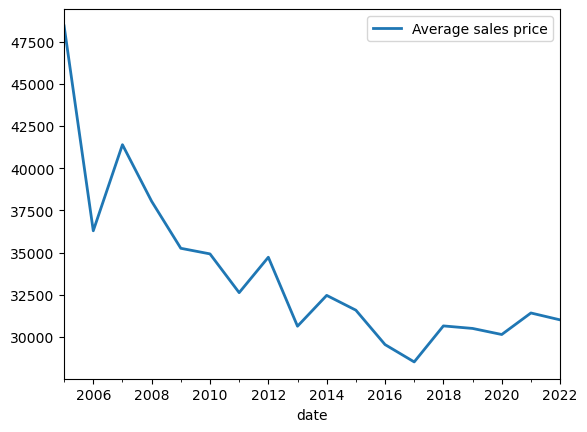

In [23]:
# Solution 3

con = sqlite3.connect('auto_dealership_database.db')
Sales = pd.read_sql('SELECT * FROM Sales', con)
con.close()

SalesDay = Sales.groupby('date')['price'].mean()
SalesDay.index = pd.to_datetime(SalesDay.index)
SalesDay.resample('A').mean().plot(lw=2, label='Average sales price', legend=True)

<AxesSubplot: xlabel='year'>

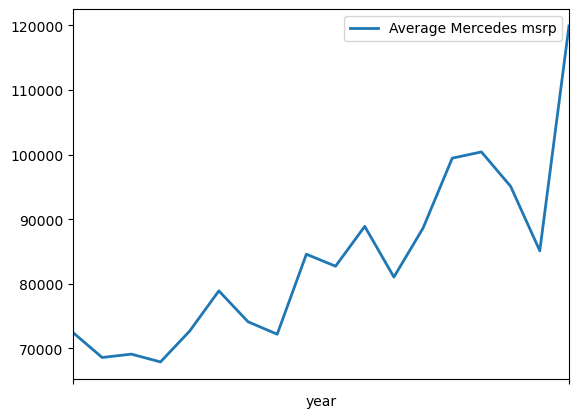

In [24]:
#Solution 4

con = sqlite3.connect('auto_dealership_database.db')
Mercedes = pd.read_sql('SELECT * FROM Cars WHERE make = "Mercedes"', con)
con.close()

MercedesDay = Mercedes.groupby('year')['msrp'].mean()
MercedesDay.index = pd.to_datetime(MercedesDay.index)
MercedesDay.plot(lw=2, label='Average Mercedes msrp', legend=True)